## Maestría en Inteligencia Artificial - HAIA: Clasificador de objetos
### Profesor: Dr. Gaddiel Desirena López
### Integrantes del equipo
* Guillermo Betanzos
* Luis Landeros
* Sergio Rojas
* Alberto Torres

### Objetivo

A lo largo del siguiente Jupyter notebook se detallará el propósito de cada pieza de código, con el cuál se define y construye un clasificador de objetos, en este caso el clasificador será diseñado para identificar cuatro clases de objeto: tazas, cubiertos, carritos de juguete y gorras.

Cada sección de código incluye una sección de "markup" previa o posterior que explica lo que se intenta realizar en cada segmento.

A continuación procederemos a importar librerías de carácter general que nos permitirá entre otras cosas graficar, realizar cálculos, acceder a funciones del sistema operativo y entre otros.

In [1]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt


Definimos el directorio donde se encuentra el conjunto de imágenes que comprenderá nuestro conjunto de datos de entrada, dicho directorio se encuentra debajo del directorio ../data/train.
      
La función image_stats nos dará una idea de las dimensiones de las imágenes que se encuentran en dicho directorio, calcularemos promedios de ancho y alto de las imágenes.

In [2]:
DIR = '../data/train/'

def image_stats():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

image_stats()

Average Height: 2854.3797468354433
Max Height: 3648
Min Height: 1280


Average Width: 2674.025316455696
Max Width: 4032
Min Width: 960


Crearemos una lista que contiene cada una de las clases de imágenes, esta lista tiene dos propósitos, por un lado identifica mediante una palabra la clase de objeto a identificar, por otro lado dentro del código se utilizará para asignar etiquetas.

In [3]:
classes=['taza','gorra','carrito','cubierto']
#classes=['taza','carrito','cubierto']

Una vez definida las clases de nuestro clasificador creamos una función que nos permitirá asignar a cada elemento del data set (conjunto de datos) dicha etiqueta, los archivos poseen el prefijo de las clases que definimos por lo que será relativamente sencillo generar una estructura que nos permita etiquetar apropiadamente cada elemento.

In [4]:
def label_img(name,clases):
    #print("----------------")
    arr=np.array([])
    word_label = name.split('_')[0]
    for l in classes:
        #print("label:",l," name:",name)
        if(word_label==l):
            arr=np.append(arr,[1])
            #print("label assigned:",l)
        else:
            arr=np.append(arr,[0])
    return arr

Mediante una función llamada <b>“load_training_data”</b> cargaremos el data set y al mismo tiempo etiquetaremos los datos.

In [5]:
IMG_SIZE = 300

def load_training_data(classes):
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img,classes)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

In [6]:
train_data = load_training_data(classes)

**“train_data”** es la estructura en la que almacenamos los datos de entrenamiento, hacemos un muestreo de dicha estructura a continuación:

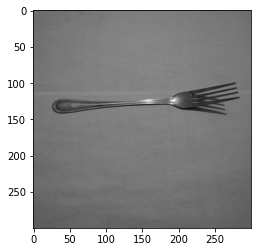

In [7]:
plt.imshow(train_data[0][0], cmap = 'gist_gray')

Figura 1. Muestreo de objetos del conjunto de datos **train**

Asimismo realizamos un muestreo de los datos que componen la estructura de etiquetas la cual tiene una correspondencia uno a uno con **“train_data”**

In [8]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])
print(trainLabels)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0.

Importamos las librerías de **tensorflow/keras**, que nos permitirá realizar la construcción del modelo.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

Nuestro modelo es multicapa, utilizamos principalmente varias capas de activación **ReLU**, adicionalmente empleamos redes neuronales convolucionales.

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))
#model.add(Dense(3, activation = 'softmax'))

A continuación se despliega las diferentes capas de las que está compuesto el modelo así como el número de nodos que compone cada capa, la última capa utiliza activación **softmax** dado que lo que esperamos es una clasificación, esta última capa posee únicamente cuatro nodos.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 96)        5

Tabla 1. Despliegue de las diferentes capas que componen el modelo.

Al momento de compilar el modelo estamos utilizando una función de pérdida catalogada como **“entropía cruzada” (crossentropy)** la cuál es una función de optimización que se utiliza en el caso de entrenar un modelo de clasificación, como el que estamos ejecutando ahora, realiza una clasificación de datos mediante la predicción de la probabilidad de que los datos pertenezcan a una clase o a otra. 

Dentro de Keras existen varios tipos de función de pérdida de entropía cruzada:
<ul>
<li>binary_crossentropy: Se utiliza como función de pérdida para el modelo de clasificación binaria. </li>
<li>sparse_categorical_crossentropy: Se utiliza como una función de pérdida para el modelo de clasificación de clases múltiples donde a la etiqueta de salida se le asigna un valor entero (0, 1, 2, 3…). Esta función de pérdida es matemáticamente la misma que categorical_crossentropy. Simplemente tiene una interfaz diferente.</li>
    <li><b>categorical_crossentropy:</b> Se utiliza como una función de pérdida para el modelo de clasificación de clases múltiples donde hay dos o más etiquetas de salida. A la etiqueta de salida se le asigna un valor de codificación de categoría única en forma de 0 y 1. La etiqueta de salida, si está presente en forma de número entero, se convierte en codificación categórica utilizando el método keras.utils to_categorical.</li>
</ul>

El optimizador utilizado para la compilación del modelo es **Adam** el cuál es un método de gradiente descendente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden.

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

En lo que se refiere a los hiperparámetros utilizados, realizamos varios ejercicios con diferentes rangos de ellos, dados los resultados con los que experimentamos concluímos que los utilizados debajo fueron suficientes para alcanzar valores de pérdida/precisión aceptables.

In [13]:
history=model.fit(trainImages, trainLabels, batch_size = 1, epochs = 30, verbose = 1)

Epoch 1/30
79/79 [==============================] - 10s 116ms/step - loss: 1.5036 - accuracy: 0.5143
Epoch 2/30
79/79 [==============================] - 9s 120ms/step - loss: 0.9635 - accuracy: 0.7398
Epoch 3/30
79/79 [==============================] - 9s 113ms/step - loss: 0.2391 - accuracy: 0.9167
Epoch 4/30
79/79 [==============================] - 9s 115ms/step - loss: 0.0904 - accuracy: 0.9835
Epoch 5/30
79/79 [==============================] - 9s 114ms/step - loss: 0.2679 - accuracy: 0.9513
Epoch 6/30
79/79 [==============================] - 9s 115ms/step - loss: 0.0825 - accuracy: 0.9799
Epoch 7/30
79/79 [==============================] - 9s 113ms/step - loss: 0.1820 - accuracy: 0.9708
Epoch 8/30
79/79 [==============================] - 9s 113ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 9/30
79/79 [==============================] - 9s 114ms/step - loss: 4.0806e-05 - accuracy: 1.0000
Epoch 10/30
79/79 [==============================] - 9s 114ms/step - loss: 0.0039 - accuracy: 0

De la misma forma que se realizó para el conjunto de datos de entrenamiento se realizará la carga de los datos de prueba con la función **load_test_data**

In [14]:
TEST_DIR = '../data/test/'
def load_test_data(classes):
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img,classes)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data(classes)


Se realiza el muestreo de datos, para verificar que efectivamente se están cargando adecuadamente.

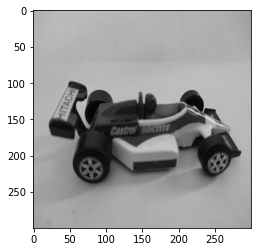

In [49]:
plt.imshow(test_data[21][0], cmap = 'gist_gray')

Figura 2. Muestreo de objetos del conjunto de datos **test**

Se realiza el código correspondiente para evaluar el data set con el modelo generado y se despliega la información pertinente a continuación

In [50]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print("Accuracy:",acc * 100, " - Loss:",loss)
#print(model.predict(testImages))
predict_arr=np.round(model.predict(testImages))
print(predict_arr)
print("El objeto es un(a):",classes[np.where(predict_arr[21]==1.)[0][0]].upper())

Accuracy: 86.36363744735718  - Loss: 1.7385491132736206
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
El objeto es un(a): CARRITO


Se observa que la gráfica se comporta en concordancia al número de objetos que el modelo pretende clasificar, realizamos ejercicios variando el número de clases de entrada y pudimos identificar que los valores trazados para pérdida varía con respecto a dicho número de clases.

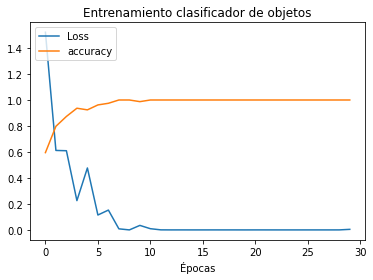

In [17]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='accuracy')

plt.title('Entrenamiento clasificador de objetos')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

Figura 3. Gráfica de los valores de precisión y pérdida para el modelo diseñado.

### Conclusiones

Deep Learning es una clase perteneciente a los algoritmos de "machine learning", el cual a través de múltiples capas extrae características de manera progresiva de mayor a menor nivel de características, partiendo de datos en crudo. 

Deep Learning es ampliamente utilizado en el procesamiento de imágenes, donde las capas más bajas van identificando bordes, mientras que las capas de mayor nivel identifican conceptos relvantes para los humanos, tales como dígitos, letras, rostros, etcétera.

La clasificación de objetos vía redes neuronales depende en gran medida de un algoritmo en específico, redes neuronales convulosionales (convolutional neural networks, CNN), es a través de este tipo de redes en el procesamiento de imágenes, que se desenredan las abstracciones y seleccionan qué carácterísticas mejoran el rendimiento.

Este reporte muestra un diseño de red en particular que logra alcanzar cifras aceptables en el discernimiento de las cuatro clases presentadas, los datos de pérdida y precisión del clasificador diseñado nos permiten concluir que el modelo es viable ya que superan el 80% de precisión, considerándolo un modelo que satisface los objetivos planteados.